In [5]:

# call __init_ to set notebook seed
import set_notebook_env
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu

from collections import defaultdict
import numpy as np

import set_notebook_env
loader, plot_utils = set_notebook_env.set_env(
    data_dir="../data/", 
    min_ratings=0, 
    max_ratings=None,
    drop_inconsistent_gender = True
)


loader.initial_setup()
prepared_df = loader.add_gender_code(loader.prepared_df)
QUAL_COLS = loader.qual_cols

DATA = prepared_df


Using seed: 18787288


In [ ]:
df = DATA.loc[
    DATA["gender_code"].isin([0, 1]),
    ["gender_code", "major", "pepper"]
].dropna()

# only 10 because otherwise too many
top_majors = df["major"].value_counts().index[:10]
df = df[df["major"].isin(top_majors)]

# Combine major + pepper
df["major_pepper"] = (
    df["major"].astype(str) + "_pepper_" + df["pepper"].astype(int).astype(str)
)


In [ ]:
contingency = pd.crosstab(
    df["gender_code"],
    df["major_pepper"]
)

contingency.shape


(2, 20)

In [9]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency)

chi2, p_value, dof


(1399.2807132445987, 1.8204465858137797e-285, 19)

In [10]:
import numpy as np

n = contingency.values.sum()
r, c = contingency.shape

cramers_v = np.sqrt(
    chi2 / (n * (min(r - 1, c - 1)))
)

cramers_v


0.24588035501932348

In [11]:
from scipy.stats import chi2_contingency

for p in [0, 1]:
    sub = df[df["pepper"] == p]
    ct = pd.crosstab(sub["gender_code"], sub["major"])
    chi2, pval, dof, _ = chi2_contingency(ct)
    print(f"pepper={p}: chi2={chi2:.2f}, p={pval:.4g}")


pepper=0: chi2=1031.16, p=3.291e-216
pepper=1: chi2=367.92, p=9.456e-74


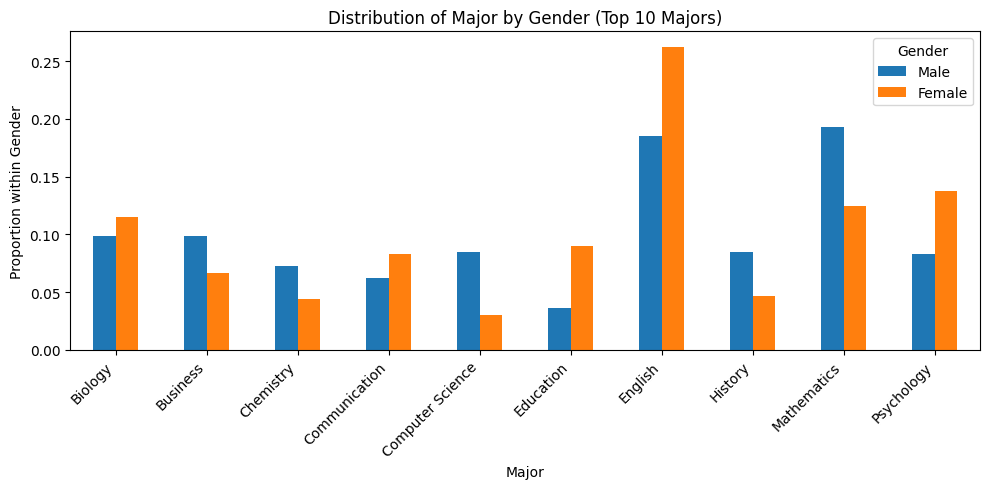

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Restrict to valid gender + top majors
df_plot = DATA.loc[
    DATA["gender_code"].isin([0, 1]),
    ["gender_code", "major"]
].dropna()

top_majors = df_plot["major"].value_counts().index[:10]
df_plot = df_plot[df_plot["major"].isin(top_majors)]

# Normalize within gender
ct = pd.crosstab(df_plot["major"], df_plot["gender_code"], normalize="columns")

ct.columns = ["Male", "Female"]

ct.plot(kind="bar", figsize=(10, 5))
plt.ylabel("Proportion within Gender")
plt.xlabel("Major")
plt.title("Distribution of Major by Gender (Top 10 Majors)")
plt.legend(title="Gender")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
